In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['axes.grid'] = False

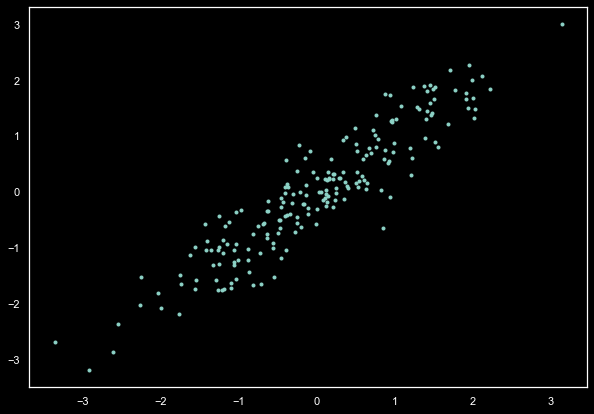

In [98]:
X = np.random.multivariate_normal([0, 0], [[1.1, 1], [1, 1.1]], 200)
plt.scatter(X[:, 0 ], X[:, 1], marker= '.')

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components= 2)

In [101]:
pca.fit(X)

PCA(n_components=2)

In [102]:
pca.components_

array([[ 0.70105292,  0.71310925],
       [ 0.71310925, -0.70105292]])

In [103]:
pca.explained_variance_

array([2.42164622, 0.09118896])

In [104]:
pro = pca.transform(X)

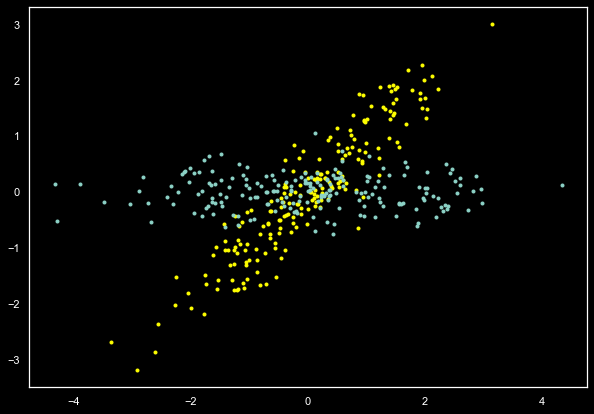

In [105]:
plt.scatter(X[:, 0 ], X[:, 1], marker= '.', color= 'yellow')
plt.scatter(pro[:, 0 ], pro[:, 1], marker= '.')

## Wait up... it is not making any sense...
Continuing with the Book

In [108]:
pca.components_

array([[ 0.70105292,  0.71310925],
       [ 0.71310925, -0.70105292]])

In [109]:
pca.explained_variance_

array([2.42164622, 0.09118896])

#### Till here...
As we have told it to get `2 Components` it gave us these. 

* Location of Components (direction)
* Their variance

(The larger the variance is, the more trustworthy that component becomes)

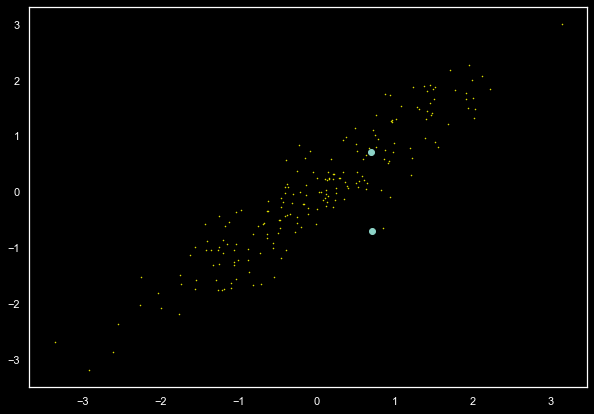

In [112]:
plt.scatter(X[:, 0 ], X[:, 1], marker= '.', color= 'yellow', s= 1)
plt.scatter(pca.components_[:,0], pca.components_[:,1])

## Here we have two freaking dots. 
(I guess they show the direction... let's draw from the mean)

In [117]:
center = X.mean(axis= 0)
center

array([ 0.01173611, -0.00216987])

In [123]:
center = pca.mean_
center

array([ 0.01173611, -0.00216987])

Well, `pca.mean_` and `X.mean(axis= 0)` are the EXACTLY same!

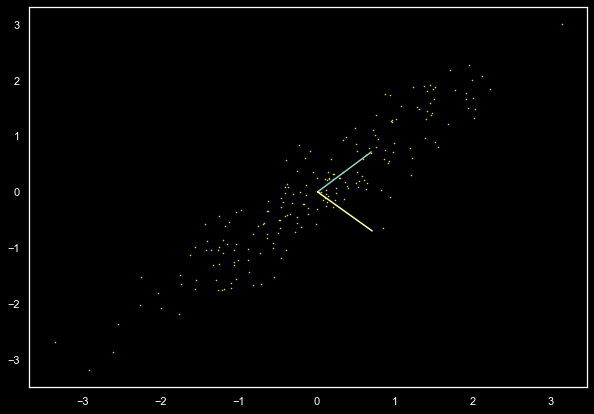

In [119]:
plt.scatter(X[:, 0 ], X[:, 1], marker= '.', color= 'yellow', s= 1)

comp1, comp2 = pca.components_

plt.plot([center[0], comp1[0]], [center[1], comp1[1]])
plt.plot([center[0], comp2[0]], [center[1], comp2[1]])

### Nah! Didn't work as expected... 

Trying with the Book's example.

# 

    In book, they add the Variance to the components -- which makes the line straight somehow...

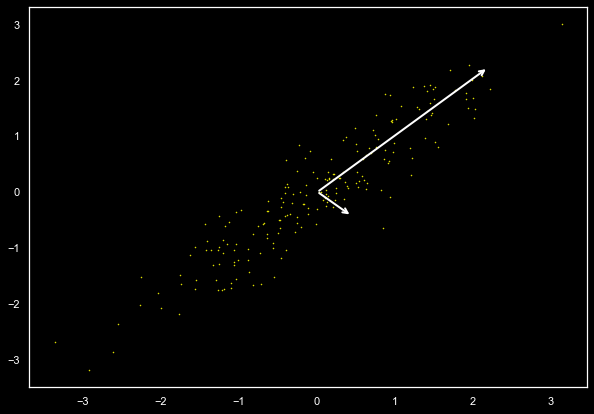

In [135]:
plt.scatter(X[:, 0 ], X[:, 1], marker= '.', color= 'yellow', s= 1)

for length_એટલે_variance, position in zip(pca.explained_variance_, pca.components_):
    offset = position * 2 * np.sqrt(length_એટલે_variance)
    
    plt.annotate('', pca.mean_ + offset, pca.mean_, arrowprops= dict(arrowstyle= '->', linewidth= 2))

#### Frankly, Actully, Fuckly, Shitly -- Don't know what is the difference between my and his plot... it is also not PERPENDICULAR.

# 

# 

# 

# 

# Now, Dimentionality Reduction.

In [136]:
pca = PCA(n_components= 1).fit(X)

In [148]:
transfored = pca.transform(X) #Which I had done previously

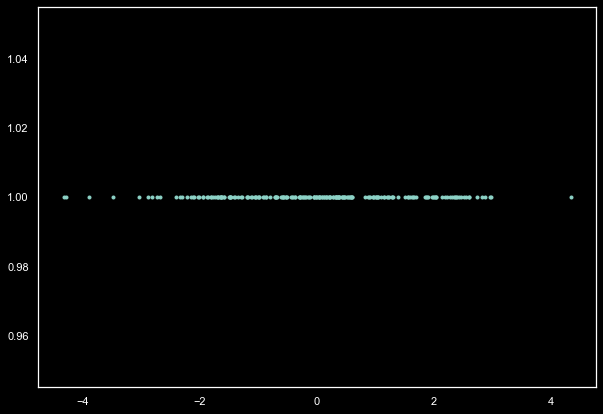

In [142]:
plt.scatter(transfored, [1] * transfored.shape[0], marker= '.')

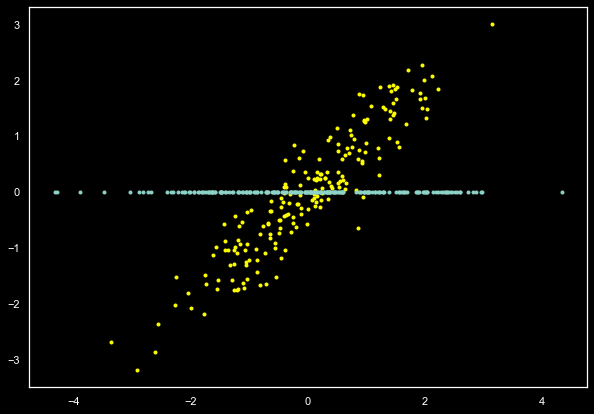

In [144]:
plt.scatter(X[:, 0 ], X[:, 1], marker= '.', color= 'yellow')
plt.scatter(transfored, [0] * transfored.shape[0], marker= '.')

### Yeah, kind of same... but let's be more precise with the `Y` given by PCA....
(see, we are just giving arbitary Y value)

In [147]:
transfored = pca.inverse_transform(X)

ValueError: shapes (200,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

#### Oops! It does not work...
# Because - What it says is that, GIVE ME THE TRANSFORMED (1-D) array and I WILL GIVE YOU THE Y BASED ON MY UNDERSTANDINGS.

In [149]:
transfored = pca.inverse_transform(transfored)

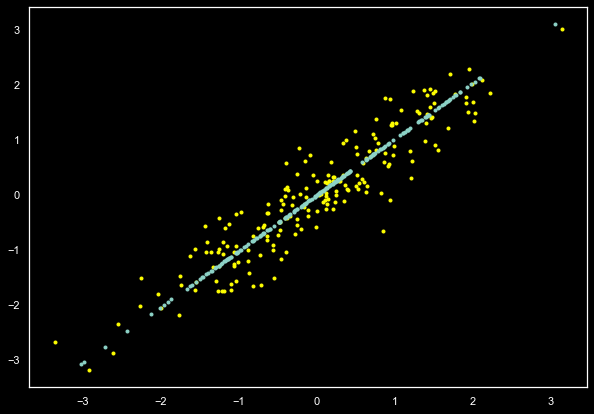

In [152]:
plt.scatter(X[:, 0 ], X[:, 1], marker= '.', color= 'yellow')
plt.scatter(transfored[:,0], transfored[:,1], marker= '.')

#### Cool!!

# 

# 

# Checking 3-D and 2D... 

In [194]:
%matplotlib inline

In [195]:
X = np.random.multivariate_normal([0,0,0], [[1.1, 1, 1],[1, 1.1, 1],[1, 1, 1.1]], 100)

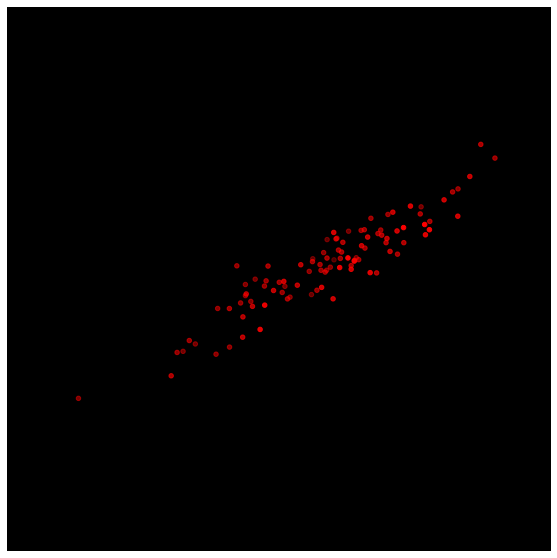

In [196]:
fig= plt.figure(figsize= (10,10))
ax = plt.axes(projection = '3d')
ax.grid(False)
ax.axis('off')
ax.scatter3D(X[:,0], X[:,1], X[:,2], color= 'red')

In [197]:
pca = PCA(n_components= 2)
pca.fit(X)

PCA(n_components=2)

In [198]:
trans = pca.transform(X)

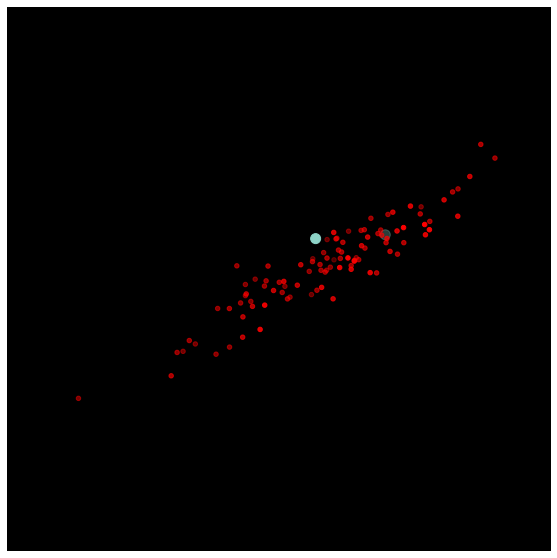

In [199]:
fig= plt.figure(figsize= (10,10))
ax = plt.axes(projection = '3d')
ax.grid(False)
ax.axis('off')

ax.scatter3D(X[:,0], X[:,1], X[:,2], color= 'red')
ax.scatter3D(comp[:, 0], comp[:, 1], comp[:, 2], s =100)

In [200]:
comp = pca.components_

In [201]:
pca.explained_variance_

array([3.40660743, 0.11507009])

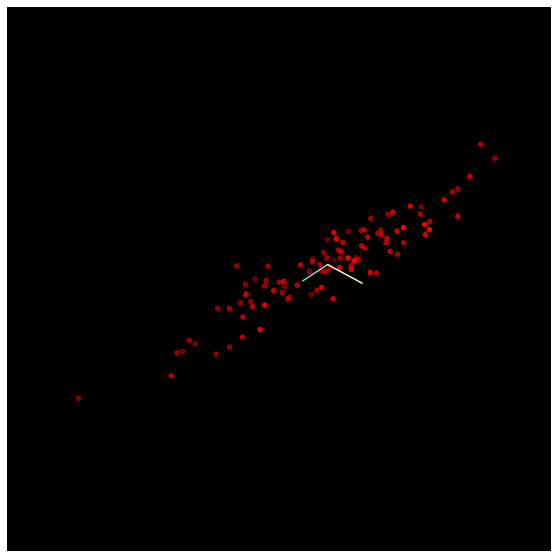

In [202]:
fig= plt.figure(figsize= (10,10))
ax = plt.axes(projection = '3d')
ax.grid(False)
ax.axis('off')

ax.scatter3D(X[:,0], X[:,1], X[:,2], color= 'red')
ax.plot3D([pca.mean_[0], comp[0][0]], [pca.mean_[1], comp[0][1]], [pca.mean_[2], comp[0][2]])
ax.plot3D([pca.mean_[0], comp[1][0]], [pca.mean_[1], comp[1][1]], [pca.mean_[2], comp[1][2]])

### Amazingly Beautiful!

In [203]:
pro = pca.inverse_transform(trans)

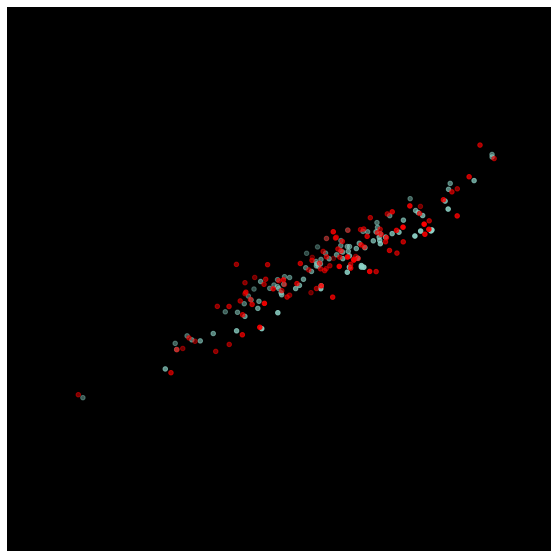

In [209]:
fig= plt.figure(figsize= (10,10))
ax = plt.axes(projection = '3d')
ax.grid(False)
ax.axis('off')

ax.scatter3D(X[:,0], X[:,1], X[:,2], color= 'red')
ax.scatter3D(pro[:,0], pro[:,1], pro[:,2])

## Better to RE-WATCH each in 3D plot... 

In [208]:
%matplotlib